# k-means clustering of longitude and latitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [144]:
active_users = pd.read_csv('data_csv/active_users.csv')

In [145]:
active_users.head(10)

,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,...,AboutMeLinks,Seniority,Student,AboutMeLength,UsaBased,latitude,longitude,country,code,Id
0,59111,2008-07-31T14:22:31Z,Jeff Atwood,2020-05-02T18:23:48Z,http://www.codinghorror.com/blog/,"El Cerrito, CA","<p><a href=""http://www.codinghorror.com/blog/a...",548898,3378,1311,...,5.0,False,False,54.0,True,33.841,-117.521144,United States of America,us,1
1,5632,2008-07-31T14:22:31Z,Geoff Dalgas,2020-05-30T06:34:16Z,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the Stack Overflow team. Find...,26613,664,88,...,2.0,False,False,15.0,True,44.5642,-123.261971,United States of America,us,2
2,15196,2008-07-31T14:22:31Z,Jarrod Dixon,2020-05-29T15:37:16Z,http://jarroddixon.com,"Raleigh, NC, United States","<p><a href=""http://blog.stackoverflow.com/2009...",26423,7756,100,...,2.0,False,False,38.0,True,35.7804,-78.639099,United States of America,us,3
3,31887,2008-07-31T14:22:31Z,Joel Spolsky,2020-05-30T17:25:45Z,https://joelonsoftware.com/,"New York, NY","<p>In 2000 I co-founded Fog Creek Software, wh...",78047,825,97,...,6.0,True,False,121.0,True,40.7127,-74.005950,United States of America,us,4
4,48438,2008-07-31T14:22:31Z,Jon Galloway,2020-05-29T23:45:55Z,http://weblogs.asp.net/jgalloway/,"San Diego, CA","<p>Technical Evangelist at Microsoft, speciali...",13046,786,34,...,0.0,False,False,29.0,True,32.7174,-117.162909,United States of America,us,5
5,1787,2008-07-31T21:33:24Z,Eggs McLaren,2018-04-09T02:04:55Z,NaN,NaN,<p>This is a puppet test account I use to vali...,7479,12,9,...,1.0,False,False,18.0,NaN,NaN,NaN,NaN,NaN,8
6,21774,2008-07-31T21:35:26Z,Kevin Dente,2020-05-29T22:23:34Z,http://weblogs.asp.net/kdente,"Oakland, CA",<p>Independent software engineer</p>\n,5967,47,4,...,0.0,False,False,3.0,True,44.4522,-64.355197,Canada,ca,9
7,101,2008-07-31T21:57:06Z,Sneakers O'Toole,2020-04-28T19:27:01Z,https://www.youtube.com/watch?v=OcSKd13mKUY,"Morganton, North Carolina United States",<p>I'm not takin' my sneakers off!\n<br><br>\n...,4263,0,0,...,0.0,False,False,21.0,True,35.7455,-81.687437,United States of America,us,10
8,4293,2008-08-01T00:59:11Z,Anonymous User,2008-08-01T00:59:11Z,NaN,NaN,NaN,2630,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,197101,2008-08-01T04:18:04Z,Chris Jester-Young,2020-05-13T05:38:58Z,http://about.cky.nz/,"Raleigh, NC, USA",<p>I use they/them to refer to myself in the t...,40458,5206,210,...,9.0,False,False,165.0,True,35.7804,-78.639099,United States of America,us,13


In [146]:
active_users.shape

(984275, 27)

In [404]:
# remove users without location
active_users_location = active_users.dropna(axis=0,how='any',subset=['latitude','longitude'])

In [405]:
active_users_location.shape

(488058, 27)

In [406]:
# extract just necessary fields
active_users_location = active_users_location[['Id', 'latitude', 'longitude']]

In [407]:
active_users_location.head()

,Id,latitude,longitude
0,1,33.841,-117.521144
1,2,44.5642,-123.261971
2,3,35.7804,-78.639099
3,4,40.7127,-74.005950
4,5,32.7174,-117.162909


## How many clusters is the right number of clusters?

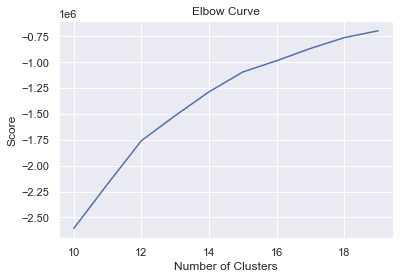

In [154]:
K_clusters = range(10,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = active_users_location[['latitude']]
X_axis = active_users_location[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

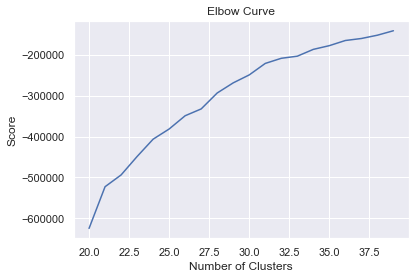

In [155]:
K_clusters = range(20,40)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = active_users_location[['latitude']]
X_axis = active_users_location[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 10 location clusters

In [408]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(active_users_location[active_users_location.columns[1:3]]) # Compute k-means clustering.
active_users_location['cluster_label_10'] = kmeans.fit_predict(active_users_location[active_users_location.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(active_users_location[active_users_location.columns[1:3]]) # Labels of each point
active_users_location.head(10)

,Id,latitude,longitude,cluster_label_10
0,1,33.841,-117.521144,3
1,2,44.5642,-123.261971,3
2,3,35.7804,-78.639099,1
3,4,40.7127,-74.005950,1
4,5,32.7174,-117.162909,3
6,9,36.2516,-118.852583,3
7,10,35.7455,-81.687437,1
9,13,35.7804,-78.639099,1
10,16,-18.9189,-48.276573,4
11,17,47.5339,-122.043302,3


## 40 location clusters

In [417]:
kmeans = KMeans(n_clusters = 40, init ='k-means++')
kmeans.fit(active_users_location[active_users_location.columns[1:3]]) # Compute k-means clustering.
active_users_location['cluster_label_40'] = kmeans.fit_predict(active_users_location[active_users_location.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(active_users_location[active_users_location.columns[1:3]]) # Labels of each point
active_users_location.head(10)

,Id,latitude,longitude,cluster_label_10,cluster_label_40
0,1,33.841,-117.521144,3,5
1,2,44.5642,-123.261971,3,26
2,3,35.7804,-78.639099,1,2
3,4,40.7127,-74.005950,1,16
4,5,32.7174,-117.162909,3,5
6,9,36.2516,-118.852583,3,5
7,10,35.7455,-81.687437,1,2
9,13,35.7804,-78.639099,1,2
10,16,-18.9189,-48.276573,4,32
11,17,47.5339,-122.043302,3,26


## 60 location clusters

In [423]:
kmeans = KMeans(n_clusters = 60, init ='k-means++')
kmeans.fit(active_users_location[active_users_location.columns[1:3]]) # Compute k-means clustering.
active_users_location['cluster_label_60'] = kmeans.fit_predict(active_users_location[active_users_location.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(active_users_location[active_users_location.columns[1:3]]) # Labels of each point
active_users_location.head(10)

,Id,latitude,longitude,cluster_label_10,cluster_label_40,cluster_label_60
0,1,33.841,-117.521144,3,5,1
1,2,44.5642,-123.261971,3,26,15
2,3,35.7804,-78.639099,1,2,30
3,4,40.7127,-74.005950,1,16,12
4,5,32.7174,-117.162909,3,5,1
6,9,36.2516,-118.852583,3,5,1
7,10,35.7455,-81.687437,1,2,30
9,13,35.7804,-78.639099,1,2,30
10,16,-18.9189,-48.276573,4,32,5
11,17,47.5339,-122.043302,3,26,15


## Merge into dataset

In [424]:
full_table_location = pd.merge(active_users, active_users_location[['Id', 'cluster_label_10', 'cluster_label_40', 'cluster_label_60']], on='Id', how='left')

In [425]:
full_table_location.head()

,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,...,AboutMeLength,UsaBased,Id,latitude,longitude,country,code,cluster_label_10,cluster_label_40,cluster_label_60
0,59111,2008-07-31T14:22:31Z,Jeff Atwood,2020-05-02T18:23:48Z,http://www.codinghorror.com/blog/,"El Cerrito, CA","<p><a href=""http://www.codinghorror.com/blog/a...",548898,3378,1311,...,54.0,True,1,33.841,-117.521144,United States of America,us,3.0,5.0,1.0
1,5632,2008-07-31T14:22:31Z,Geoff Dalgas,2020-05-30T06:34:16Z,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the Stack Overflow team. Find...,26613,664,88,...,15.0,True,2,44.5642,-123.261971,United States of America,us,3.0,26.0,15.0
2,15196,2008-07-31T14:22:31Z,Jarrod Dixon,2020-05-29T15:37:16Z,http://jarroddixon.com,"Raleigh, NC, United States","<p><a href=""http://blog.stackoverflow.com/2009...",26423,7756,100,...,38.0,True,3,35.7804,-78.639099,United States of America,us,1.0,2.0,30.0
3,31887,2008-07-31T14:22:31Z,Joel Spolsky,2020-05-30T17:25:45Z,https://joelonsoftware.com/,"New York, NY","<p>In 2000 I co-founded Fog Creek Software, wh...",78047,825,97,...,121.0,True,4,40.7127,-74.005950,United States of America,us,1.0,16.0,12.0
4,48438,2008-07-31T14:22:31Z,Jon Galloway,2020-05-29T23:45:55Z,http://weblogs.asp.net/jgalloway/,"San Diego, CA","<p>Technical Evangelist at Microsoft, speciali...",13046,786,34,...,29.0,True,5,32.7174,-117.162909,United States of America,us,3.0,5.0,1.0


In [427]:
full_table_location.to_csv('data_csv/active_users.csv')